# Import Libraries

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Load Data

In [4]:
dataset_path = r'C:\Users\manhm\Desktop\Logicstic Regression\titanic_modified_dataset.csv'

In [5]:
df = pd.read_csv(dataset_path, index_col='PassengerId')

In [6]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Title     891 non-null    int64  
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


In [8]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.359147,0.936027,0.383838
std,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.638707,1.725341,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,16.000000,1.000000


In [9]:
df.value_counts()

Pclass  Sex  Age   SibSp  Parch  Fare     Embarked  Title  Survived
3       0    28.0  0      0      7.8958   0         0      0           15
                                 8.0500   0         0      0           12
                                 7.7500   2         0      0            9
        1    28.0  0      0      7.7500   2         2      1            7
2       0    28.0  0      0      0.0000   0         0      0            6
                                                                       ..
             33.0  0      0      12.2750  0         0      0            1
             34.0  0      0      13.0000  0         0      1            1
                   1      0      26.0000  0         0      0            1
             35.0  0      0      10.5000  0         0      0            1
3       1    63.0  0      0      9.5875   0         1      1            1
Name: count, Length: 782, dtype: int64

In [10]:
dataset_arr = df.to_numpy().astype (np. float64 )
X, y = dataset_arr[: , : -1],dataset_arr [: , -1]

In [11]:
X.shape

(891, 8)

In [12]:
y.shape

(891,)

In [13]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [14]:
X_b[0]

array([ 1.  ,  3.  ,  0.  , 22.  ,  1.  ,  0.  ,  7.25,  0.  ,  0.  ])

In [15]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size = val_size, random_state=random_state, shuffle= is_shuffle)

In [17]:
X_train , X_test , y_train , y_test = train_test_split(
X_train , y_train ,
test_size = test_size ,
random_state = random_state ,
shuffle = is_shuffle
)

In [18]:
X_train.shape

(623, 9)

In [19]:
X_test.shape

(89, 9)

In [20]:
X_val.shape

(179, 9)

In [21]:
normalizer = StandardScaler ()
X_train [: , 1:] = normalizer . fit_transform ( X_train [: , 1:])
X_val [: , 1:] = normalizer . transform ( X_val [: , 1:])
X_test [: , 1:] = normalizer . transform ( X_test [: , 1:])

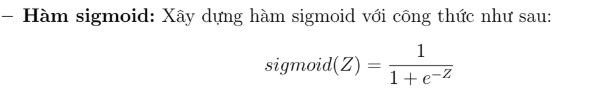

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [23]:
def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

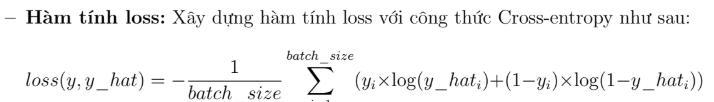

In [24]:
def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    loss = -y*np.log(y_hat)-(1-y)*np.log(1-y_hat)
    return loss.mean()

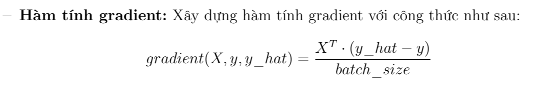

In [25]:
def compute_gradient (X, y, y_hat ) :
    return np.dot(X.T, (y_hat - y))/y.size

In [26]:
def update_theta (theta , gradient , lr) :
    return theta - lr * gradient

In [27]:
def compute_accuracy (X , y , theta ) :
    y_hat = predict(X, theta ).round ()
    acc = (y_hat == y).mean ()
    return acc

# Khai báo các siêu tham số và khởi tạo weights:


In [28]:
lr = 0.01
epochs = 100
batch_size = 16
np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [29]:
import numpy as np

# Khởi tạo danh sách lưu lại quá trình huấn luyện
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        Xi = X_train[i:i+batch_size]
        yi = y_train[i:i+batch_size]

        y_hat = predict(Xi, theta)  # Dự đoán đầu ra
        train_loss = compute_loss(y_hat, yi)  # Tính loss
        gradient = compute_gradient(Xi, yi, y_hat)  # Tính gradient

        theta = update_theta(theta, gradient, lr)  # Cập nhật tham số

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)  # Độ chính xác
        train_batch_accs.append(train_acc)

    # Tính loss và accuracy cho tập validation
    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)
    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

    # Tính trung bình loss & accuracy trong batch
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    # Lưu vào danh sách chính
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    # In kết quả từng epoch
    print(f'\nEPOCH {epoch+1}: Training loss: {train_batch_loss:.3f} \tValidation loss: {val_batch_loss:.3f}')



EPOCH 1: Training loss: 0.703 	Validation loss: 0.590

EPOCH 2: Training loss: 0.670 	Validation loss: 0.574

EPOCH 3: Training loss: 0.640 	Validation loss: 0.560

EPOCH 4: Training loss: 0.614 	Validation loss: 0.549

EPOCH 5: Training loss: 0.592 	Validation loss: 0.539

EPOCH 6: Training loss: 0.572 	Validation loss: 0.531

EPOCH 7: Training loss: 0.554 	Validation loss: 0.524

EPOCH 8: Training loss: 0.539 	Validation loss: 0.519

EPOCH 9: Training loss: 0.526 	Validation loss: 0.514

EPOCH 10: Training loss: 0.514 	Validation loss: 0.511

EPOCH 11: Training loss: 0.504 	Validation loss: 0.508

EPOCH 12: Training loss: 0.495 	Validation loss: 0.506

EPOCH 13: Training loss: 0.487 	Validation loss: 0.504

EPOCH 14: Training loss: 0.480 	Validation loss: 0.503

EPOCH 15: Training loss: 0.474 	Validation loss: 0.502

EPOCH 16: Training loss: 0.468 	Validation loss: 0.501

EPOCH 17: Training loss: 0.463 	Validation loss: 0.500

EPOCH 18: Training loss: 0.459 	Validation loss: 0.500



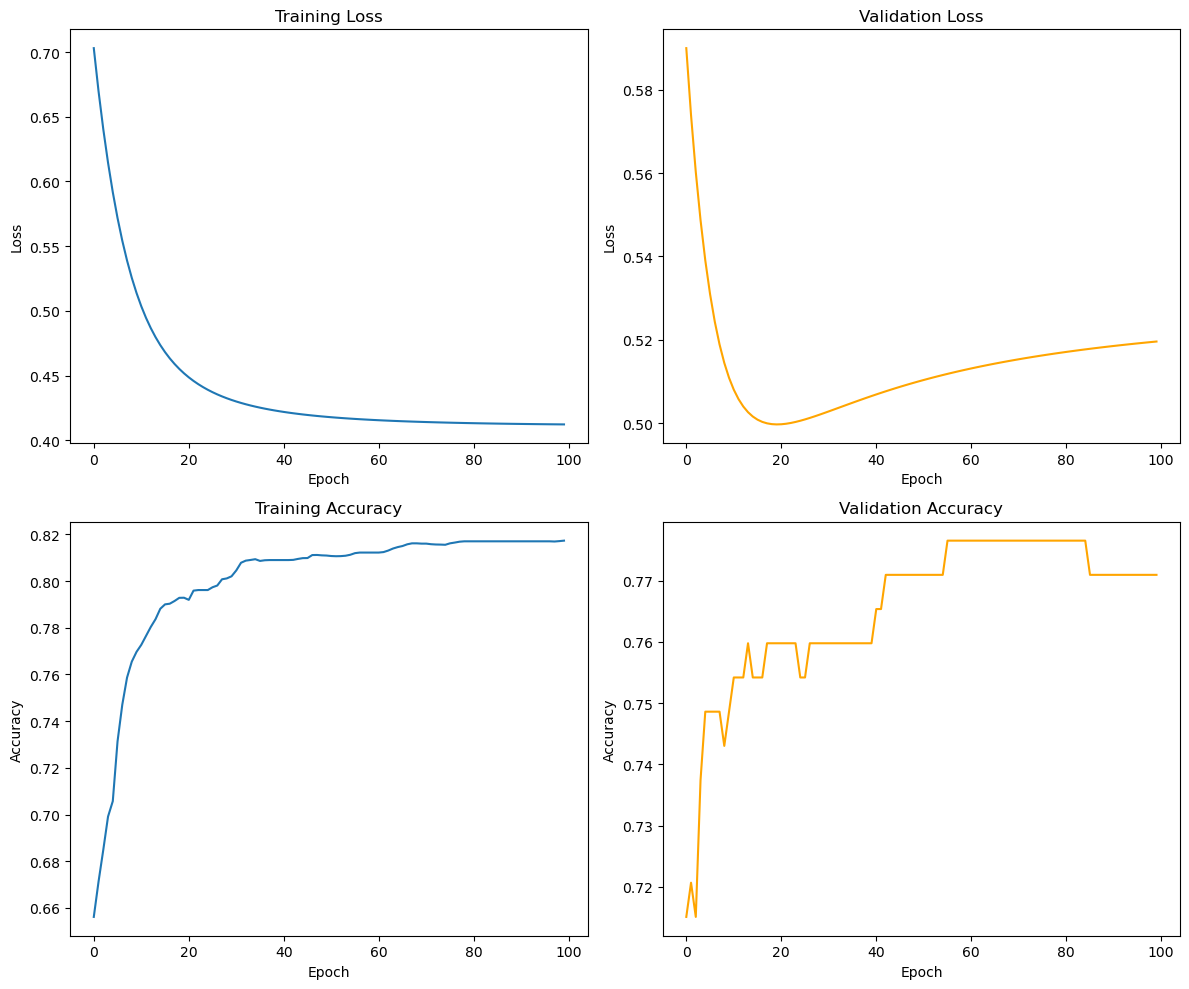

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Training Loss
ax[0, 0].plot(train_losses)
ax[0, 0].set_xlabel('Epoch')
ax[0, 0].set_ylabel('Loss')
ax[0, 0].set_title('Training Loss')

# Validation Loss
ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set_xlabel('Epoch')
ax[0, 1].set_ylabel('Loss')
ax[0, 1].set_title('Validation Loss')

# Training Accuracy
ax[1, 0].plot(train_accs)
ax[1, 0].set_xlabel('Epoch')
ax[1, 0].set_ylabel('Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Validation Accuracy
ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set_xlabel('Epoch')
ax[1, 1].set_ylabel('Accuracy')
ax[1, 1].set_title('Validation Accuracy')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [32]:
# Tính độ chính xác trên tập validation và test
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

# In kết quả đánh giá
print('Evaluation on validation and test set:')
print(f'Validation Accuracy: {val_set_acc:.4f}')
print(f'Test Accuracy: {test_set_acc:.4f}')


Evaluation on validation and test set:
Validation Accuracy: 0.7709
Test Accuracy: 0.7753
